<a href="https://colab.research.google.com/github/toraaglobal/Case_Studies/blob/master/Week9_MNIST_TF_WalkThrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# SINGLE LAYER AND MULTI LAYER NETWORKS FOR MNIST
# BASED ON CODE FROM TENSORFLOW TUTORIAL

import tensorflow as tf

In [2]:
# MY TEST TO MAKE SURE TF IS WORKING

hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

b'Hello, TensorFlow!'


In [3]:
# MY TEST TO MAKE SURE I AM USING GPU

tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
# OBTAIN DATA
# DATA WITHIN TF TUTORIAL HAS BEEN PREPROCESSED

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [0]:
# MODEL
# CREATE PLACEHOLDER VARIABLES FOR OPERATION MANIPULATION
# THE 784 MATCHES THE VECTOR SIZE OF THE MNIST IMAGES - 28*28

x = tf.placeholder(tf.float32, [None, 784])

In [6]:
# MODEL
# CREATE WEIGHTS & BIASES VARIABLES
# IN TF, OUR MODEL PARAMETERS ARE OFTEN MANAGED AS VARIABLES

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# MODEL
# CREATE MODEL - USES SOFTMAX AS THE ACTIVATION FUNCTION
# REMEMBER GOAL FOR ACTIVATION FUNCTION IS TO "SHAPE" THE 
# OUTPUT INTO A PROBABILITY DISTRO OVER THE 10 CLASSES

y = tf.nn.softmax(tf.matmul(x, W) + b)


In [0]:
# MODEL
# CREATE PREDICTED VARIABLE Y-HAT
# AND USE CROSS ENTROPY TO DETERMINE LOSS
# CROSS ENTROPY - HOW INEFFICIENT ARE OUR PREDICTIONS?

y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))


In [9]:
# MODEL
# TRAIN USING GRADIENT DESCENT
# LEARNING RATE AT MIDPOINT - .5 - MAKE SMALL ADJUSTMENTS TO MINIMIZE COST

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

Instructions for updating:
Use tf.cast instead.


In [0]:
# MODEL - RUN

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
for _ in range(10000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [11]:
# EVALUATE MODEL

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))


0.9232


## Block Two for MNIST on TensorFlow

The following code offers an alternative approach to the MNIST classification problem.
Using two convolution layers, we can significantly improve upon the original model and explore some of the options for a deep neural network.

In [0]:
# WEIGHT INITIALIZATION

def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

In [0]:
# CREATE CONVOLUTION AND POOLING LAYERS

def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [0]:
# FIRST CONVOLUTION LAYER

W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x, [-1, 28, 28, 1]) # BASE IMAGE SIZE OF 28 * 28

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)  # RESULTING IMAGE SIZE IS 14 * 14


In [0]:
# SECOND CONOLUTION LAYER 
# MORE THAN ONE LAYER?  DEEP LEARNING

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [0]:
# FULLY CONNECTED LAYER - BEFORE OUTPUT

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)  # ADD THE RECTIFIED LINEAR UNIT


In [17]:
# DROP LAYER - REDUCE OVERFITTING

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# LAST LAYER - OUTPUT

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [20]:
# RUN THE MODEL

cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for i in range(10000):
    batch = mnist.train.next_batch(50)
    if i % 100 == 0:
      train_accuracy = accuracy.eval(feed_dict={
          x: batch[0], y_: batch[1], keep_prob: 1.0})
      print('step %d, training accuracy %g' % (i, train_accuracy))
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

  print('test accuracy %g' % accuracy.eval(feed_dict={
      x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

step 0, training accuracy 0.14
step 100, training accuracy 0.82
step 200, training accuracy 0.92
step 300, training accuracy 1
step 400, training accuracy 0.96
step 500, training accuracy 0.92
step 600, training accuracy 0.96
step 700, training accuracy 0.98
step 800, training accuracy 0.96
step 900, training accuracy 0.92
step 1000, training accuracy 0.98
step 1100, training accuracy 0.96
step 1200, training accuracy 0.96
step 1300, training accuracy 0.98
step 1400, training accuracy 0.94
step 1500, training accuracy 0.98
step 1600, training accuracy 1
step 1700, training accuracy 1
step 1800, training accuracy 1
step 1900, training accuracy 0.94
step 2000, training accuracy 0.98
step 2100, training accuracy 0.96
step 2200, training accuracy 0.96
step 2300, training accuracy 1
step 2400, training 

In [22]:
# BASIC WALK THROUGH FOR MNIST NN
# BASED ON KERAS TUTORIALS (2019)

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [24]:
# OBTAIN

from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()


# SCRUB
# FLATTEN 28 x 28 IMAGE TO 784 VECTOR
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')



# SCRUB
# NORMALIZE INPUTS FROM RGB COLOR TO 0-1
X_train = X_train / 255
X_test = X_test / 255


# SCRUB
# THE OLD ONE HOT ENCODE - CONVERT "CATEGORICAL" CLASSIFICATION TO ENCODE
# A "BINARIZATION" OF THE CATEGORIES
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

11493376/11490434 [==============================] - 2s 0us/step


In [25]:
# MODEL
# BUILD THE BASELINE

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
  
  
  
  
  
# MODEL
# RUN THE MODEL

model = baseline_model()

# FIT THE MODEL

history  = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, batch_size=1000, verbose=2)

# EVALUATE THE MODEL
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/300
 - 1s - loss: 0.5392 - acc: 0.8503 - val_loss: 0.2424 - val_acc: 0.9313
Epoch 2/300
 - 0s - loss: 0.2064 - acc: 0.9423 - val_loss: 0.1715 - val_acc: 0.9514
Epoch 3/300
 - 0s - loss: 0.1497 - acc: 0.9582 - val_loss: 0.1367 - val_acc: 0.9602
Epoch 4/300
 - 0s - loss: 0.1152 - acc: 0.9680 - val_loss: 0.1135 - val_acc: 0.9660
Epoch 5/300
 - 0s - loss: 0.0933 - acc: 0.9741 - val_loss: 0.1023 - val_acc: 0.9687
Epoch 6/300
 - 0s - loss: 0.0784 - acc: 0.9783 - val_loss: 0.0888 - val_acc: 0.9725
Epoch 7/300
 - 0s - loss: 0.0638 - acc: 0.9824 - val_loss: 0.0827 - val_acc: 0.9750
Epoch 8/300
 - 0s - loss: 0.0546 - acc: 0.9852 - val_loss: 0.0754 - val_acc: 0.9767
Epoch 9/300
 - 0s - loss: 0.0462 - acc: 0.9880 - val_loss: 0.0730 - val_acc: 0.9770
Epoch 10/300
 - 0s - loss: 0.0390 - acc: 0.9904 - val_loss: 0.0710 - val_acc: 0.9783
Epoch 11/300
 - 0s - loss: 0.0340 - acc: 0.9919 - val_loss: 0.0661 - val_acc: 0.9791
Epoch 12/300
 - 0s - los

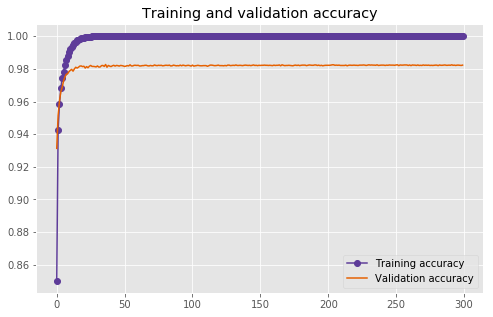

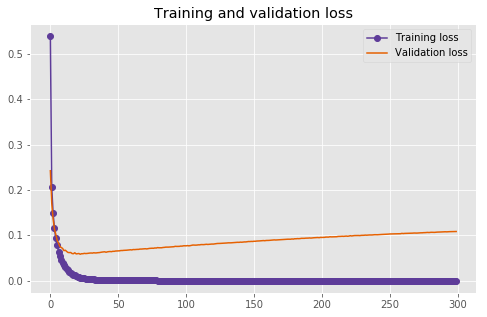

In [26]:
# INTERPRET 
# BUILD FUNCTION FOR PLOTTING THE RESULTS OF THE MODEL

def plot_train_curve(history):
    colors = ['#e66101','#fdb863','#b2abd2','#5e3c99']
    accuracy = history.history['acc']
    val_accuracy = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(accuracy))
    with plt.style.context("ggplot"):
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, accuracy, marker='o', c=colors[3], label='Training accuracy')
        plt.plot(epochs, val_accuracy, c=colors[0], label='Validation accuracy')
        plt.title('Training and validation accuracy')
        plt.legend()
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, loss, marker='o', c=colors[3], label='Training loss')
        plt.plot(epochs, val_loss, c=colors[0], label='Validation loss')
        plt.title('Training and validation loss')
        plt.legend()
        plt.show()
    
plot_train_curve(history)